# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [ ]:
#This dataset from Kaggle (https://www.kaggle.com/datasets/ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
data = '/content/drive/MyDrive/BMLP/Live.csv'
df = pd.read_csv(data)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

1. **Memahami Struktur Data**

In [ ]:
df.shape

(7050, 16)

*   Disini terlihat bahwa dataset terdiri dari 7050 baris dan 16 kolom


In [ ]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

*   informasi diatas menampilkan jenis data di setiap kolom




2. **Menangani Data yang Hilang**

*   Melakukan cek missing value pada datases



In [ ]:
df.isnull().sum()

,0
status_id,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0


*   Terlihat bahwa terdapat 4 kolom yang redundan dalam dataset. Untuk menangani hal tersebut perlu dilakukan penghapusan.



In [ ]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


Sekarang, kita dapat melihat bahwa kolom yang berlebihan telah dihapus dari kumpulan data.

Kita dapat melihat bahwa, ada 3 variabel karakter (tipe data = object) dan 9 variabel numerik yang tersisa (tipe data = int64).

3. **Analisis Distribusi dan Korelasi**  

Analisis distribusi variabel numerik

In [ ]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


Ada 3 variabel kategori dalam dataset. Saya akan membahasnya satu per satu.

In [ ]:
#lihat label pada variabel

df['status_id'].unique()

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

In [ ]:
# lihat berapa banyak tipe variabel yang berbeda

len(df['status_id'].unique())

6997

Terlihat bahwa ada 6997 label unik dalam variabel status_id. Jumlah total kejadian dalam kumpulan data adalah 7050. Jadi, ini kira-kira merupakan pengidentifikasi unik untuk setiap kejadian. Jadi ini bukan variabel yang dapat kita gunakan. Oleh karena itu, akan diabaikan saja.

Jelajahi variabel status_published

In [ ]:
df['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [ ]:
len(df['status_published'].unique())

6913

Terlihat bahwa ada 6913 label unik dalam variabel status_published. Jumlah total instance dalam dataset adalah 7050. Jadi, ini juga merupakan pengidentifikasi unik untuk setiap instance. Jadi ini bukan variabel yang dapat kita gunakan. Oleh karena itu, akan dihilangkan juga

Jelajahi variabel status_type

In [ ]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [ ]:
len(df['status_type'].unique())

4

Hapus variabel status_id dan status_published dari dataset

In [ ]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [ ]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


4. **Visualisasi Data**  

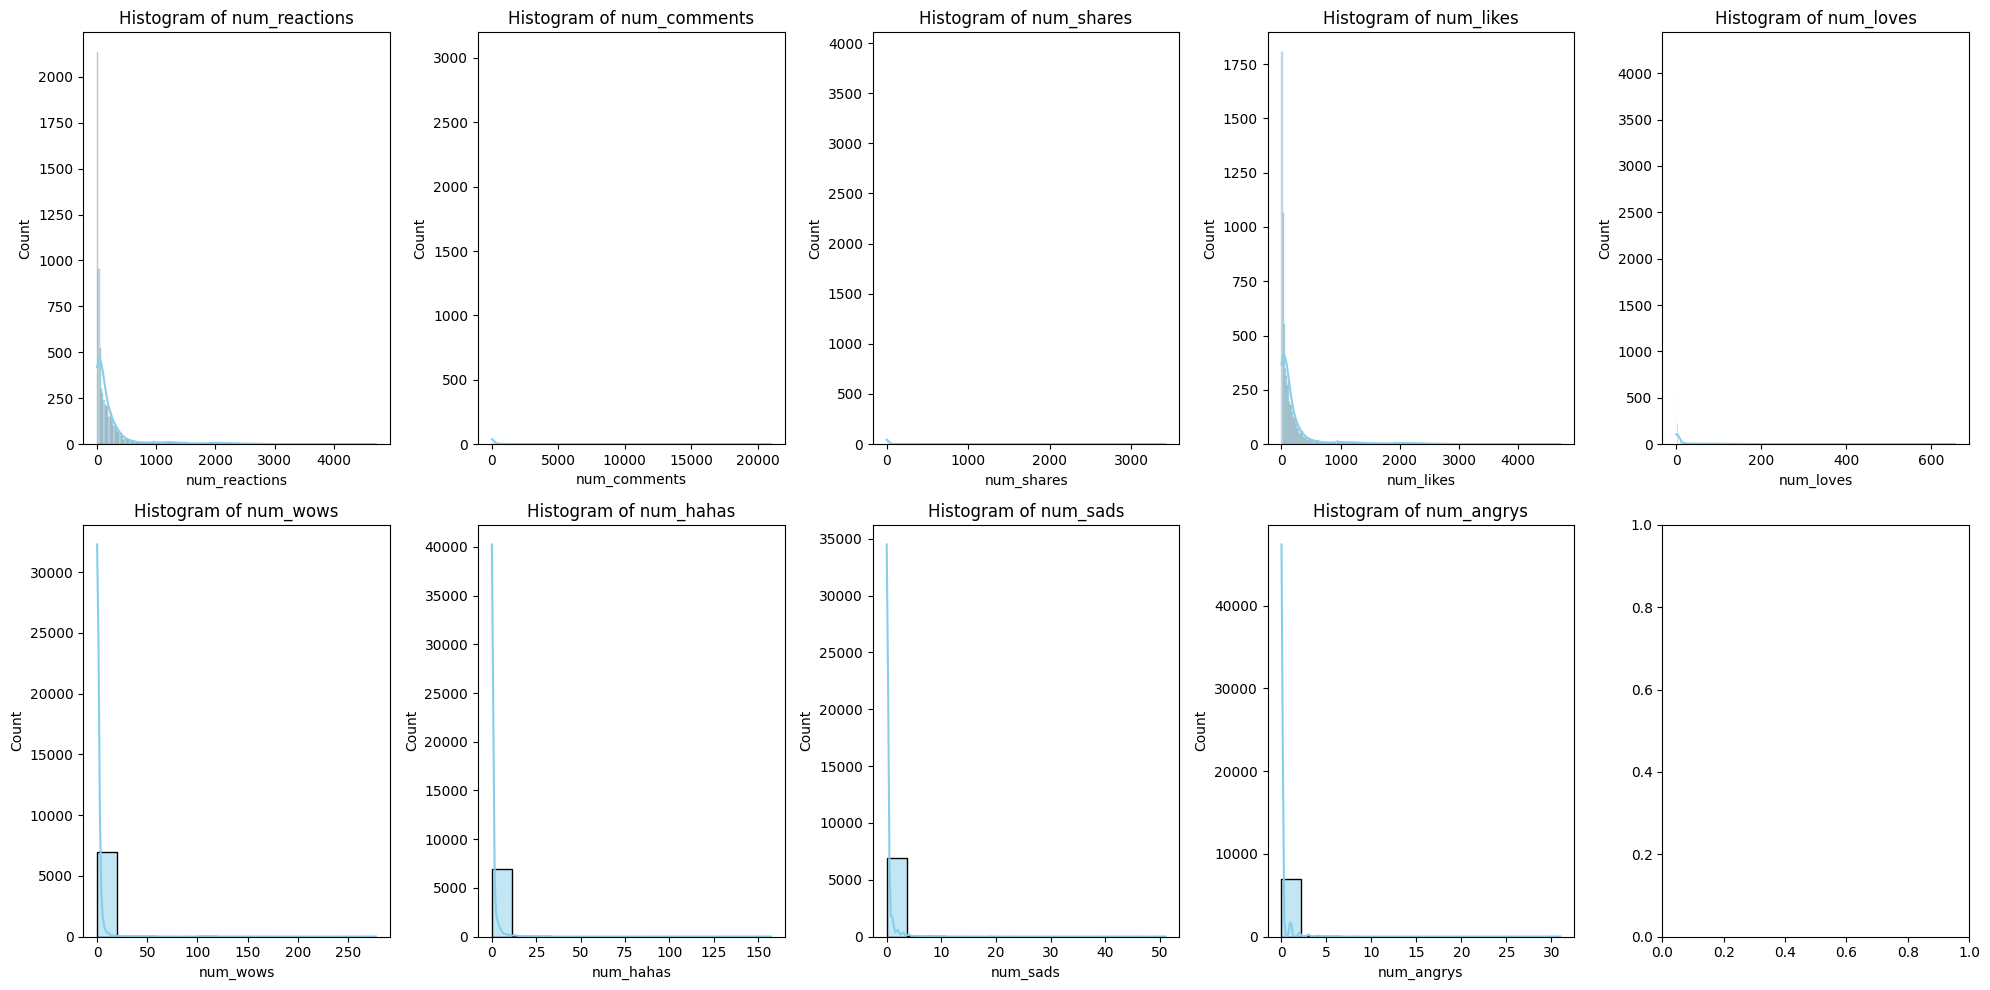

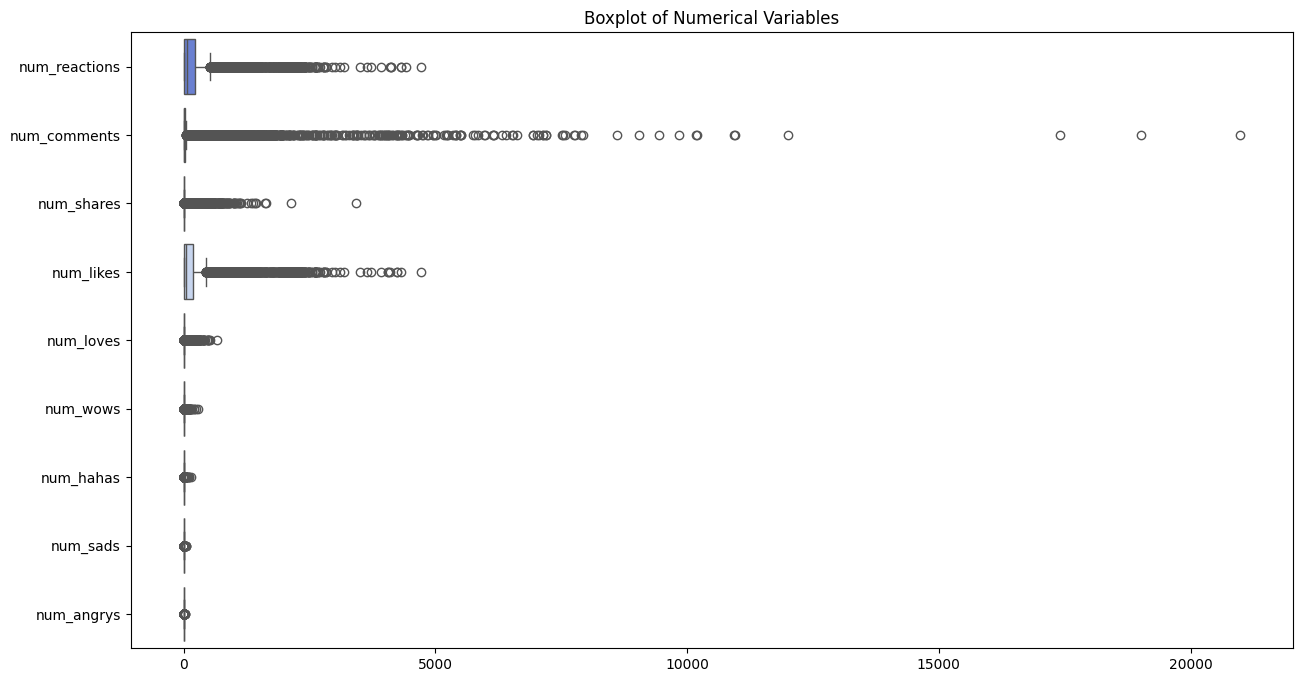

In [ ]:
numerical_cols = [
    "num_reactions", "num_comments", "num_shares",
    "num_likes", "num_loves", "num_wows",
    "num_hahas", "num_sads", "num_angrys"
]
# Visualisasi distribusi menggunakan boxplot dan histogram
fig, axes = plt.subplots(2, len(numerical_cols) // 2 + 1, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numerical_cols], orient="h", palette="coolwarm")
plt.title("Boxplot of Numerical Variables")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

**Inisialisasi vector fitur dan variabel target**

In [ ]:
X = df

y = df['status_type']

**Mengubah variabel kategori menjadi bilangan bulat**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['status_type'] = le.fit_transform(X['status_type'])

y = le.transform(y)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int64
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB


In [ ]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


**Scaling Fitur**

Proses transformasi data untuk memastikan bahwa nilai fitur berada dalam rentang tertentu. Disini menggunakan Min Max Scaling.

In [ ]:
cols = X.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score
# from scipy.stats import mode

# # 1. Normalize the data
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=[cols])

In [ ]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

#**Menggunakan Model K-Means dengan 2 Cluster**

In [ ]:
# from sklearn.cluster import AgglomerativeClustering
# from sklearn.metrics import accuracy_score

# # Inisialisasi model Hierarchical Clustering
# hierarchical = AgglomerativeClustering(n_clusters=9)  # n_clusters menentukan jumlah cluster

# # Melatih model Hierarchical Clustering
# labels = hierarchical.fit_predict(X)

# # Evaluasi akurasi
# correct_labels = sum(y == labels)
# accuracy = correct_labels / float(y.size)

# print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
# print("Accuracy score: {:.2f}".format(accuracy))


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [ ]:
kmeans.cluster_centers_

array([[9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03],
       [3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03]])

In [ ]:
kmeans.inertia_

237.7572640441955

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 4288 out of 7050 samples were correctly labeled.


In [ ]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.61


#**Silhouette Score Method**

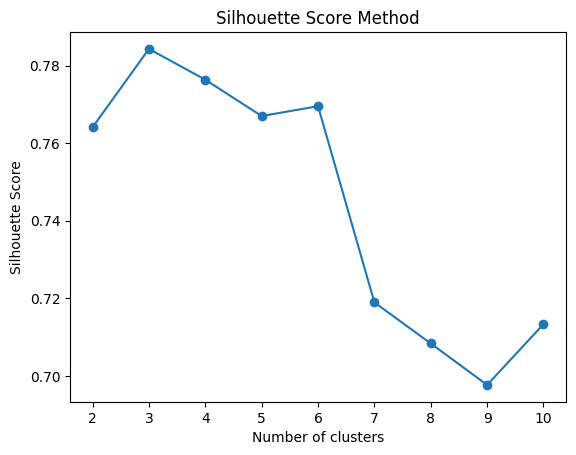

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Compute silhouette scores for different numbers of clusters
silhouette_scores = []
for i in range(2, 11):  # Start from 2 because silhouette is undefined for 1 cluster
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()



*   Terlihat k=3 sebagai jumlah cluster yang baik untuk mengelompokkan data ini.
*   Namun, sebelumnya saya telah mencapai akurasi klasifikasi yang lemah sebesar 61% dengan k=2.
*   Setelah ini dilakukan perubahan kode menggunakan silhoutte scoure yang diperlukan dengan k=3 agar convinience.



In [ ]:
# Choose the number of clusters with the highest silhouette score
best_n_clusters = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print(f"Best number of clusters: {best_n_clusters}")

# Apply KMeans with the best number of clusters
kmeans = KMeans(n_clusters=best_n_clusters, random_state=0)
labels = kmeans.fit_predict(X)

# Calculate silhouette score for the final clustering
final_silhouette_score = silhouette_score(X, labels)
print(f"Final Silhouette Score: {final_silhouette_score:.2f}")

Best number of clusters: 3
Final Silhouette Score: 0.76


Jadi, model clustering mencapai akurasi sebesar 76%.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

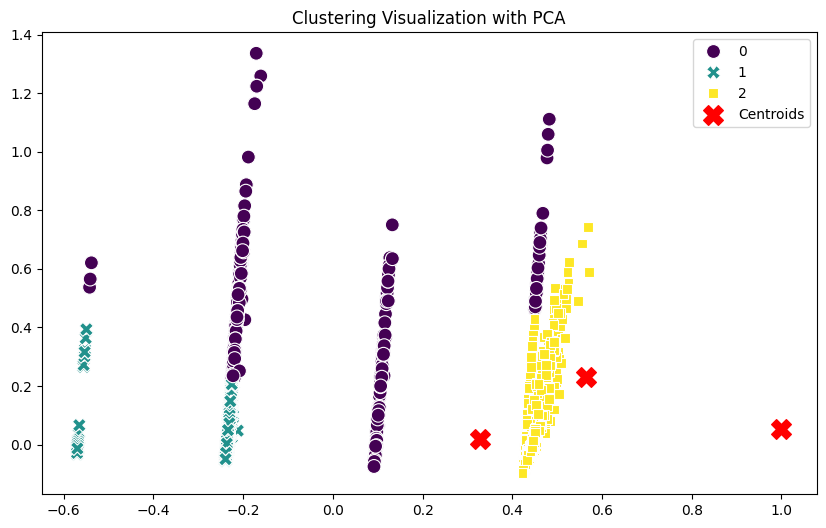

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Proyeksi data ke 2D menggunakan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=kmeans.labels_,
    palette="viridis",
    style=kmeans.labels_,
    s=100
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,
    c="red",
    marker="X",
    label="Centroids"
)
plt.title("Clustering Visualization with PCA")
plt.legend()
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

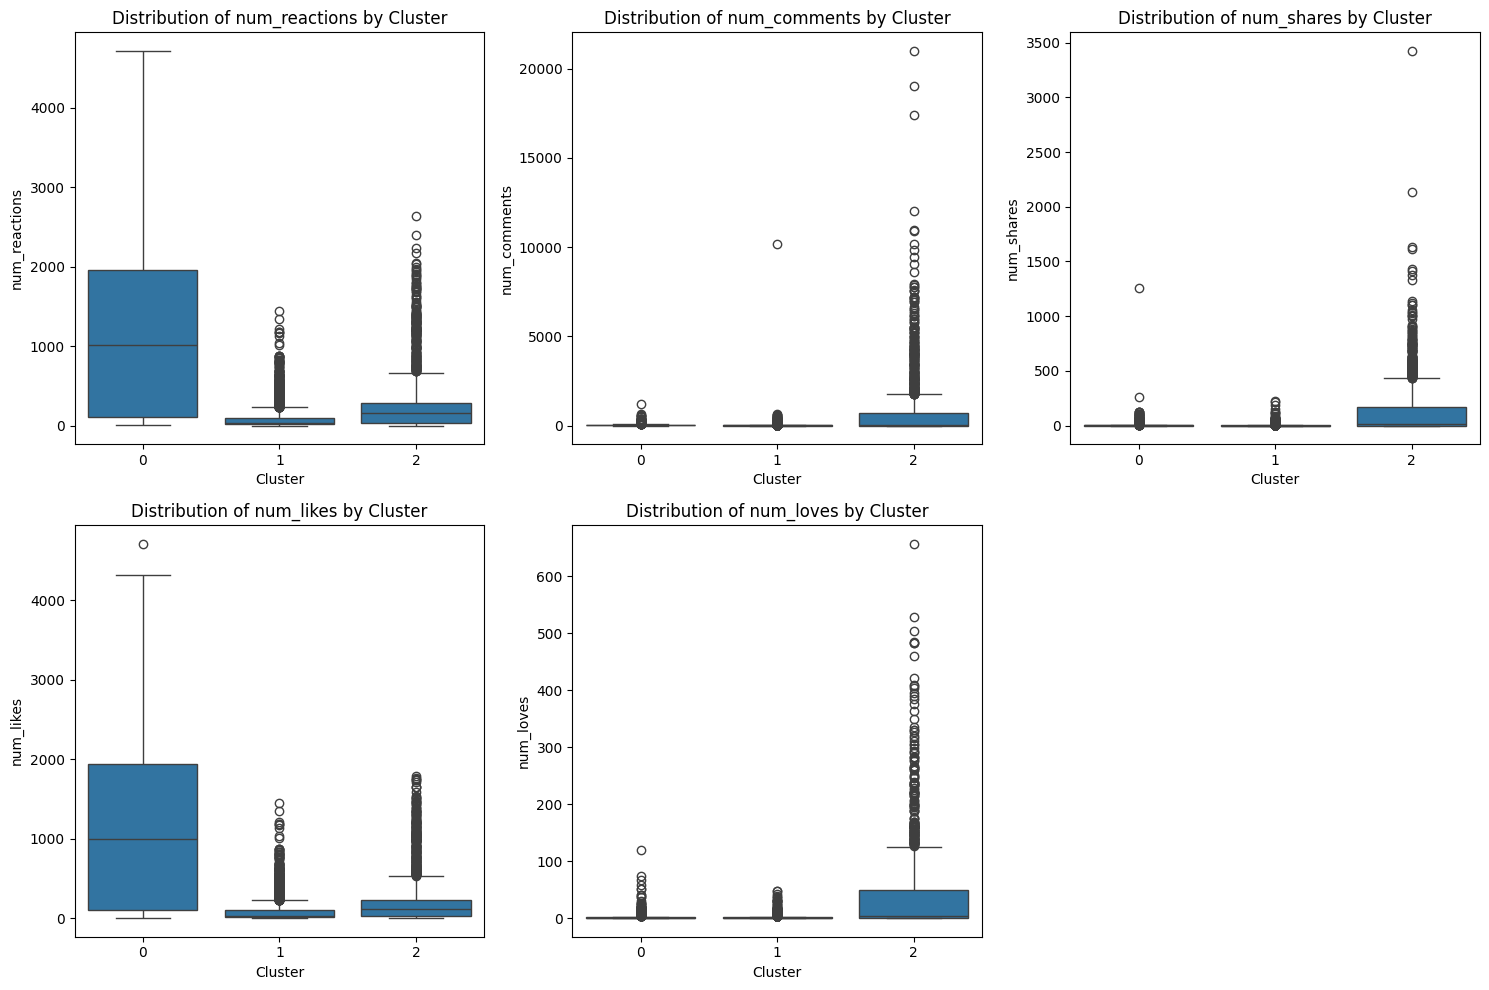

         status_type  num_reactions  num_comments  num_shares    num_likes  \
Cluster                                                                      
0           1.692790    1079.992163     44.181818    8.758621  1074.887147   
1           0.985919      89.895849     13.575868    1.798252    87.775188   
2           3.000000     245.534235    653.119494  117.385085   204.417793   

         num_loves  num_wows  num_hahas  num_sads  num_angrys  
Cluster                                                        
0         2.804075  1.830721   0.214734  0.239812    0.015674  
1         1.213159  0.536052   0.175528  0.145424    0.047342  
2        36.175752  2.491932   1.766245  0.421282    0.258613  


In [ ]:
# Menambahkan label cluster ke dataset
df['Cluster'] = kmeans.labels_

# Statistik deskriptif per cluster
cluster_stats = df.groupby('Cluster').mean()

# Visualisasi distribusi fitur dalam setiap cluster
import matplotlib.pyplot as plt
import seaborn as sns

features = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Cluster')
plt.tight_layout()
plt.show()

# Tampilkan statistik per cluster
print(cluster_stats)


Hasil Interpretasi:

**Cluster 0**
*   Rata-rata Status Type: 1.69
*   Rata-rata Jumlah Reaksi (num_reactions): 1079.99
*   Rata-rata Jumlah Komentar (num_comments): 44.18
*   Rata-rata Jumlah Dibagikan (num_shares): 8.76
*   Rata-rata Likes: 1074.89

Analisis:
Cluster ini merepresentasikan konten yang sangat populer dan mendapatkan banyak perhatian dalam bentuk likes dan jumlah reaksi total. Meskipun begitu, jumlah komentar dan shares relatif lebih rendah dibandingkan reaksi lainnya. Konten dalam cluster ini kemungkinan besar bersifat informatif atau menarik secara umum, tetapi kurang mendorong audiens untuk berdiskusi atau membagikan konten.

**Cluster 1**
*   Rata-rata Status Type: 0.99
*   Rata-rata Jumlah Reaksi (num_reactions): 89.90
*   Rata-rata Jumlah Komentar (num_comments): 13.58
*   Rata-rata Jumlah Dibagikan (num_shares): 1.80
*   Rata-rata Likes: 87.77

Analisis:
Cluster ini mencakup konten dengan tingkat perhatian yang paling rendah. Jumlah reaksi, komentar, dan shares berada pada tingkat minimal. Hal ini menunjukkan bahwa konten dalam cluster ini kurang menarik atau kurang relevan bagi audiens. Konten ini mungkin bersifat umum atau memiliki daya tarik yang terbatas.

**Cluster 2**
*   Rata-rata Status Type: 3.00
*   Rata-rata Jumlah Reaksi (num_reactions): 245.53
*   Rata-rata Jumlah Komentar (num_comments): 653.12
*   Rata-rata Jumlah Dibagikan (num_shares): 117.39
*   Rata-rata Likes: 204.42

Analisis:
Cluster ini merepresentasikan konten yang viral atau sangat emosional, dengan jumlah shares dan komentar yang sangat tinggi. Selain itu, jumlah reaksi emosional seperti loves juga jauh lebih besar dibandingkan cluster lainnya. Konten dalam cluster ini kemungkinan besar bersifat inspiratif, menyentuh hati, atau memprovokasi diskusi publik. Audiens cenderung terlibat aktif dengan konten ini baik melalui berbagi maupun berkomentar.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Ekspor data ke dalam file CSV
df.to_csv('clustered_data1.csv', index=False)
print("Data berhasil diekspor ke file 'clustered_data1.csv'.")

Data berhasil diekspor ke file 'clustered_data1.csv'.
